<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/HA_LMS_Curvas_Nivel_Erro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

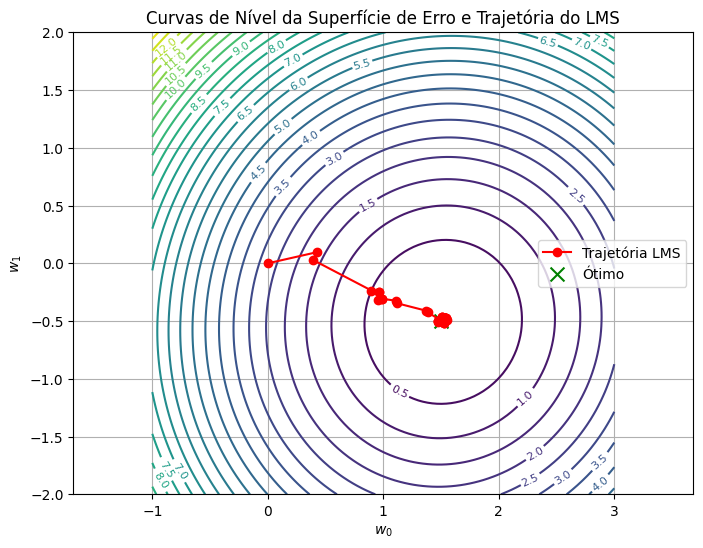

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação básica: sistema de 2 coeficientes
np.random.seed(0)

# Parâmetros
n_iter = 50               # número de iterações do LMS
mu = 0.1                  # passo de adaptação
true_w = np.array([1.5, -0.5])  # coeficientes reais do sistema

# Geração de dados de entrada
N = 100
x = np.random.randn(N, 2)
d = x @ true_w + 0.1 * np.random.randn(N)  # saída desejada com ruído

# Inicialização
w = np.zeros(2)
ws = [w.copy()]  # para guardar a trajetória dos pesos

# LMS
for n in range(n_iter):
    y = x[n] @ w
    e = d[n] - y
    w = w + mu * e * x[n]
    ws.append(w.copy())

ws = np.array(ws)

# ----- Cálculo da superfície de erro -----

# Grade de coeficientes
w0_vals = np.linspace(-1, 3, 100)
w1_vals = np.linspace(-2, 2, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Superfície de erro J(w0, w1)
J = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w_temp = np.array([W0[j, i], W1[j, i]])
        e = d[:n_iter] - x[:n_iter] @ w_temp
        J[j, i] = np.mean(e ** 2)

# ----- Plot -----
plt.figure(figsize=(8, 6))
cp = plt.contour(W0, W1, J, levels=30, cmap='viridis')
plt.clabel(cp, inline=True, fontsize=8)
plt.plot(ws[:, 0], ws[:, 1], marker='o', color='red', label='Trajetória LMS')
plt.scatter(true_w[0], true_w[1], color='green', marker='x', s=100, label='Ótimo')
plt.title('Curvas de Nível da Superfície de Erro e Trajetória do LMS')
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()